In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Weight Height Data.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='Height', ylabel='Count'>

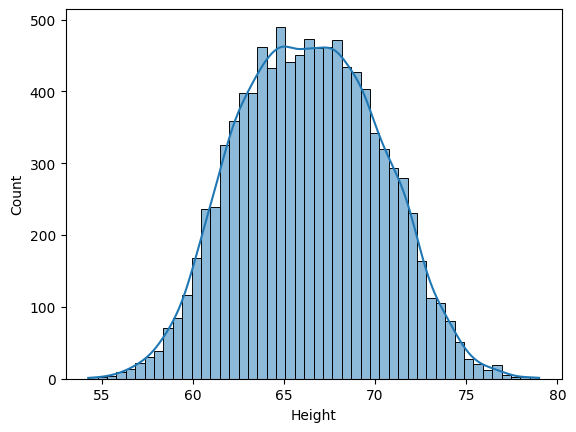

In [5]:
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

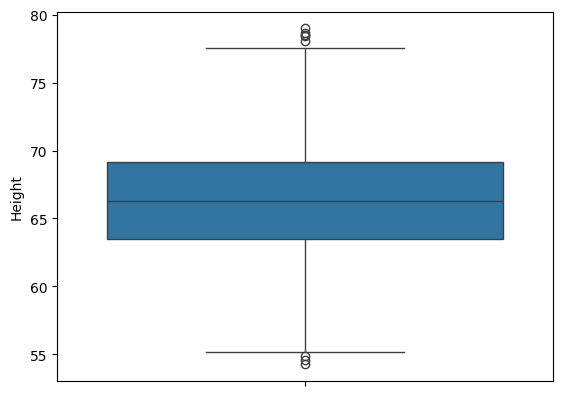

In [6]:
sns.boxplot(df['Height'])

In [7]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [8]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [9]:
new_df = df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]

In [10]:
new_df['Height'].describe()

,Height
count,9800.000000
mean,66.364366
std,3.645075
min,58.134496
25%,63.577162
50%,66.318070
75%,69.119896
max,74.785714


<Axes: ylabel='Height'>

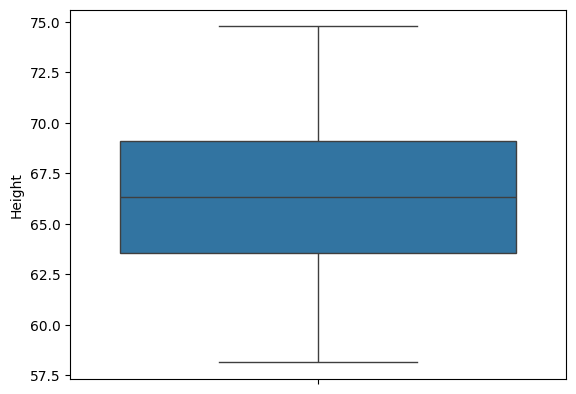

In [11]:
sns.boxplot(new_df['Height'])

<Axes: xlabel='Height', ylabel='Count'>

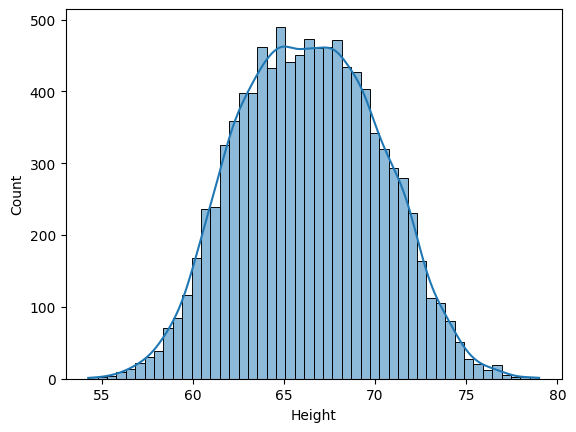

In [12]:
sns.histplot(df['Height'],kde=True)

In [13]:
#capping --> winsorization
df['Height'] = np.where(df['Height'] >=upper_limit,upper_limit,
                        np.where(df['Height'] <=lower_limit,lower_limit,
                                 df['Height']))
df.shape

(10000, 3)

In [14]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


<Axes: xlabel='Height', ylabel='Count'>

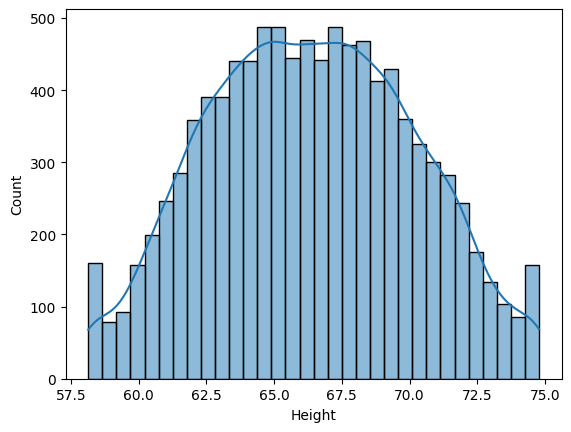

In [15]:
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

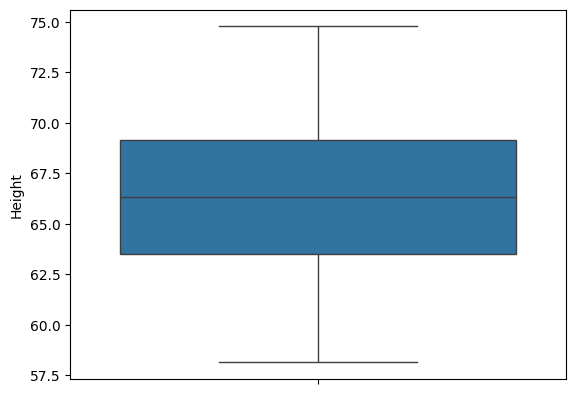

In [16]:
sns.boxplot(df['Height'])